In [92]:
# Import libraries that'll be used
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import os
import h5py
import math
from mpl_toolkits.axes_grid1.inset_locator import (inset_axes, InsetPosition, mark_inset)
from matplotlib import cm

In [94]:
# print("Current working directory:", os.getcwd())

In [96]:
goldenRatio = (5**.5 - 1) / 2.

In [98]:
'''
    Truncate colors from continuous color palette
'''

def obtain_colors(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [100]:
'''
    A simple function to extrapolate data from HDF5 file
'''

def data_extrapolation(file_name, label):
    tmp_file = h5py.File(file_name, "r")
    print(tmp_file.keys())
    if label not in tmp_file.keys():
        print("Error: key doesn't exist!")
    else:
        tmp_Sz = np.array(tmp_file[label]).transpose()
    print(tmp_Sz.shape)
    return tmp_Sz

In [102]:
'''
    Truncate colors from continuous color palette
'''

def obtain_color(number_of_lines, palette):
    color_interval = np.linspace(0, 1, number_of_lines)
    colors = [palette(x) for x in color_interval]
    return colors

In [284]:
color = obtain_color(12, cm.gist_heat_r)

In [293]:
Czz_TD = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_update.h5", "Czz_unequaltime")

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 200)


In [295]:
# Czz_TD[19, :]

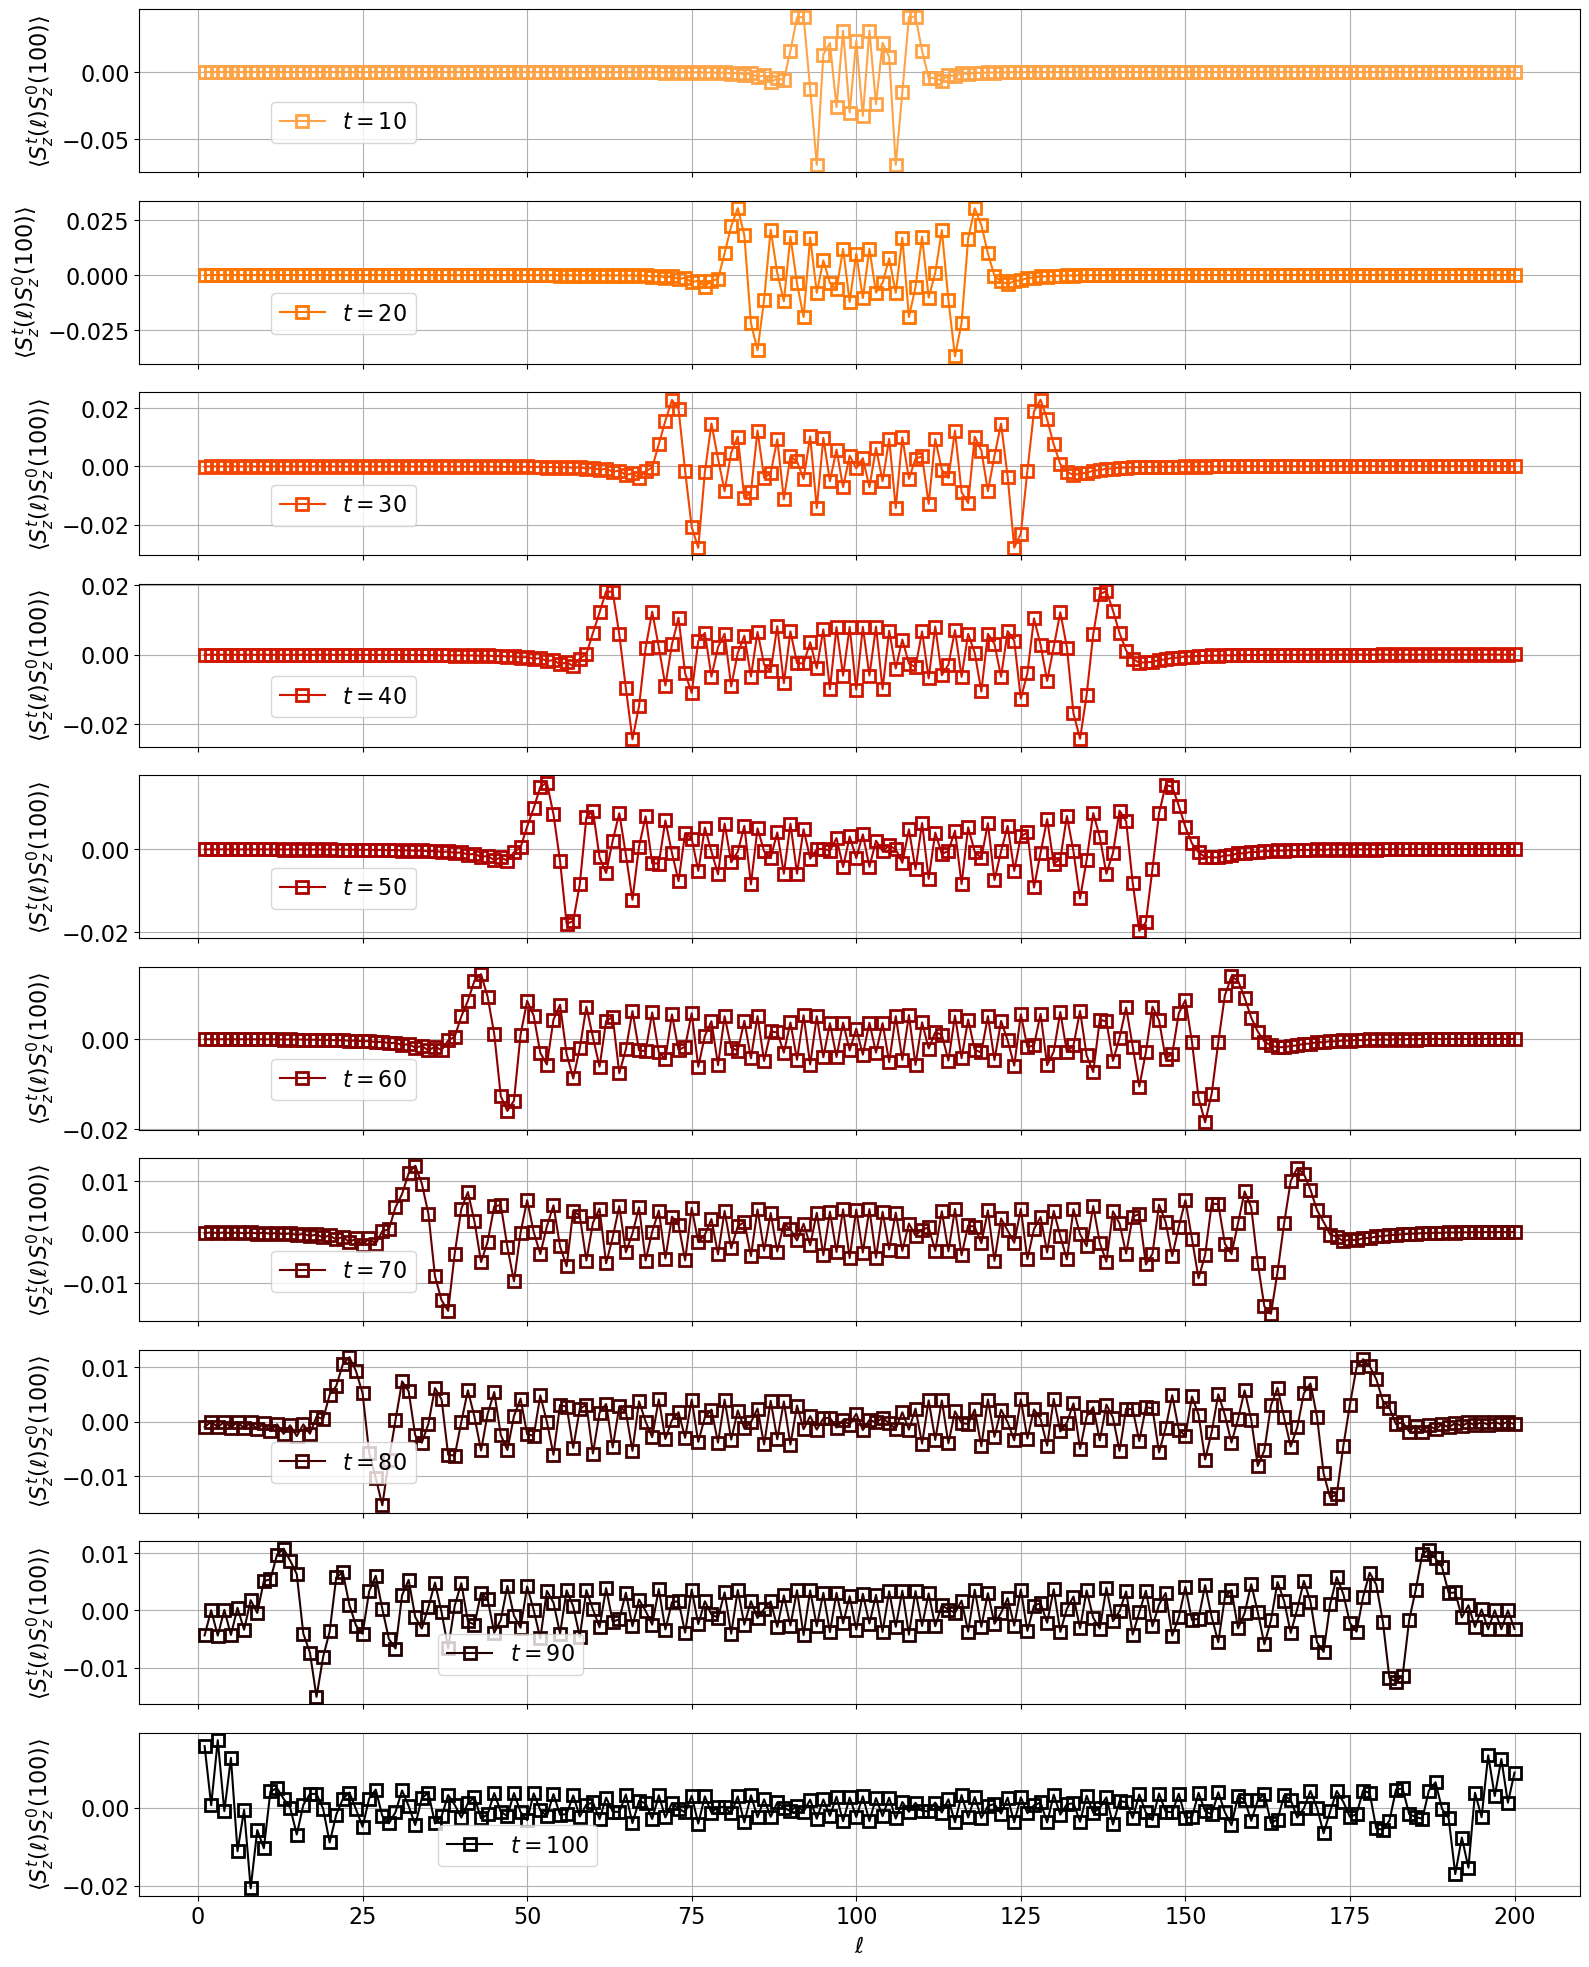

In [299]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the kicked Ising model
'''

fig = plt.figure(figsize = (16, 32 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)

for index in range(10):
    ax = fig.add_subplot(spec[index, 0])
    ax.plot(np.arange(1, 201), Czz_TD[(index + 1) * 100 - 1, :].real, color = color[index + 2], \
            marker = "s", markersize = 8, markeredgewidth = 2, markerfacecolor = "none", label = label[index])
    
    if index != 9:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("$\ell$", fontsize = 16)

    ax.legend(frameon = True, fontsize = 16, bbox_to_anchor = [0.2, 0.5], bbox_transform = ax.transAxes)
    ax.set_ylabel(r'$\langle S_{z}^{t}(\ell)S_{z}^{0}(100) \rangle$', fontsize = 16)    
    ax.tick_params(axis = "both", which = "major", labelsize = 16)
    ax.grid()  

plt.savefig('Figures/XX_TEBD_N200_T100_Time_Dependent_Czz.pdf')

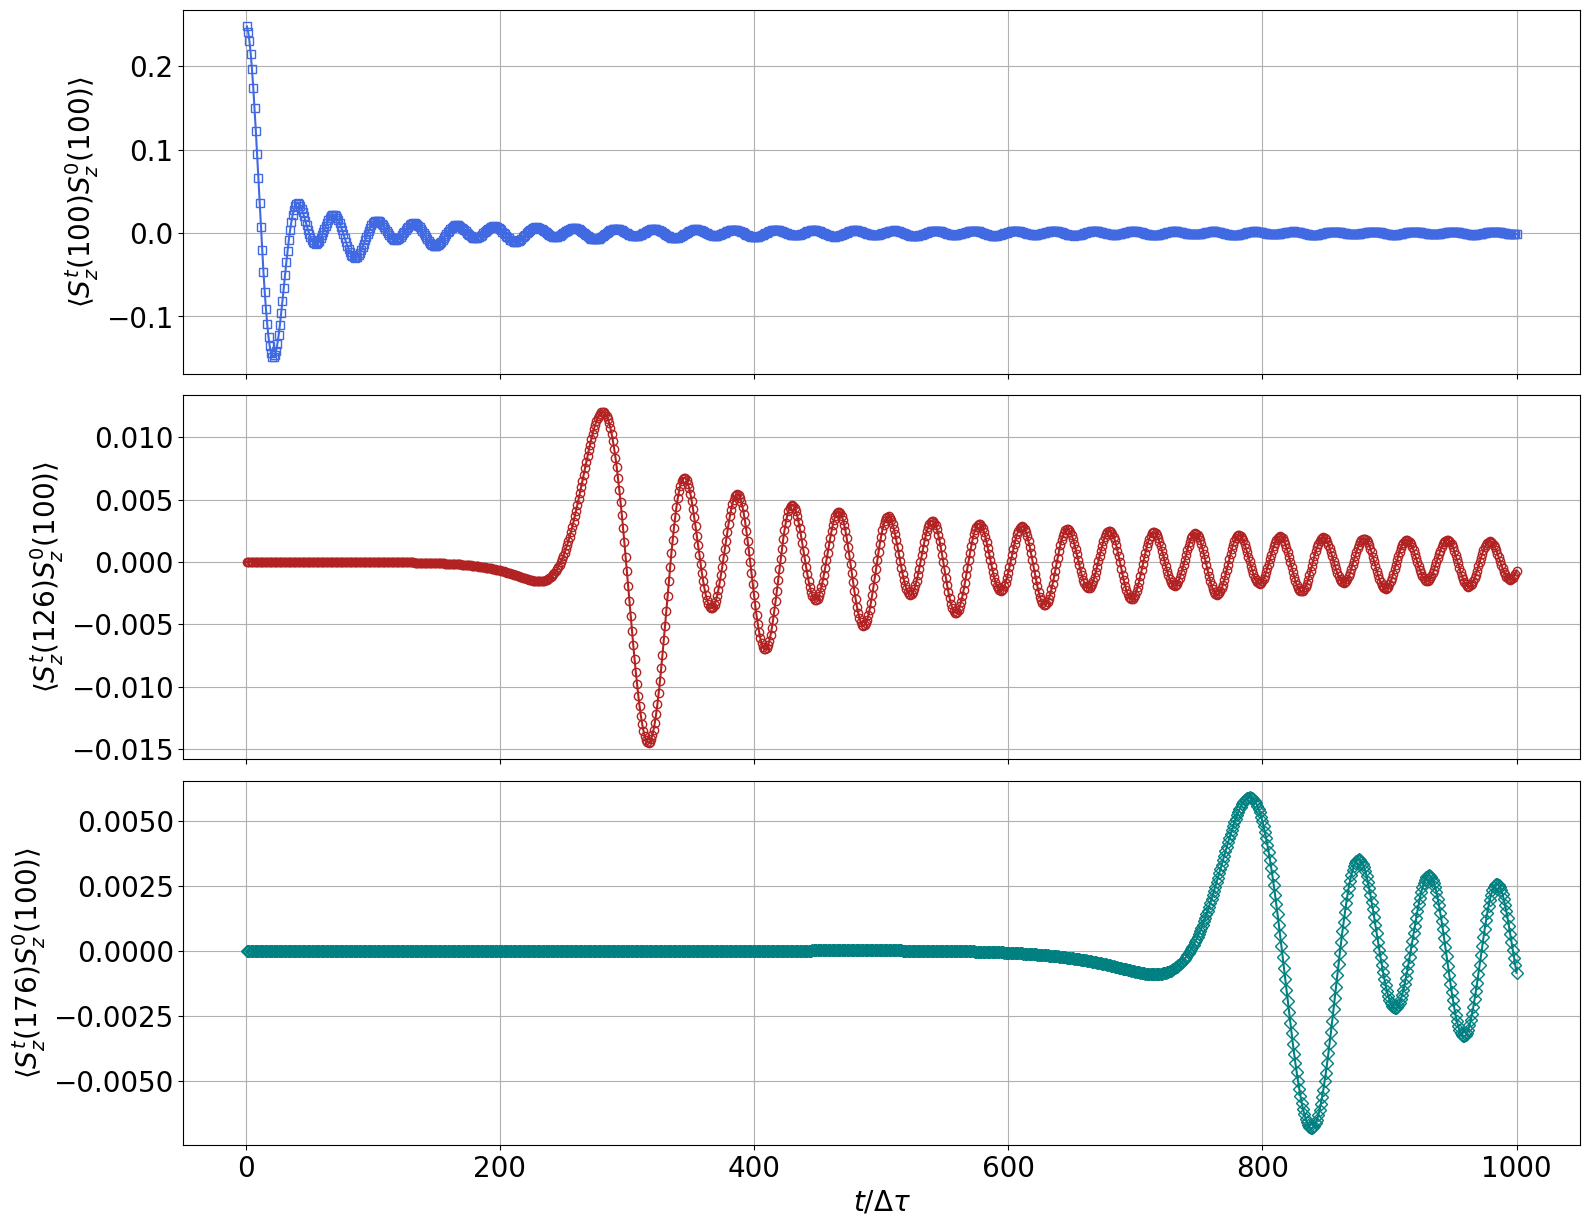

In [341]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the kicked Ising model
'''

fig = plt.figure(figsize = (16, 20 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 3, ncols = 1, figure = fig)


ax = fig.add_subplot(spec[0, 0])
ax.plot(np.arange(1, 1001), Czz_TD[:, 99].real / 2, color = "royalblue", \
        marker = "s", markersize = 6, markeredgewidth = 1, markerfacecolor = "none",)

ax.set_xticklabels([])
ax.set_ylabel(r'$\langle S_{z}^{t}(100)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  


ax = fig.add_subplot(spec[1, 0])
ax.plot(np.arange(1, 1001), Czz_TD[:, 125].real / 2, color = "firebrick", \
        marker = "o", markersize = 6, markeredgewidth = 1, markerfacecolor = "none",)

ax.set_xticklabels([])
ax.set_ylabel(r'$\langle S_{z}^{t}(126)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  


ax = fig.add_subplot(spec[2, 0])
ax.plot(np.arange(1, 1001), Czz_TD[:, 175].real / 2, color = "teal", \
        marker = "D", markersize = 6, markeredgewidth = 1, markerfacecolor = "none",)
ax.set_xlabel(r'$t / \Delta\tau$', fontsize = 20)
ax.set_ylabel(r'$\langle S_{z}^{t}(176)S_{z}^{0}(100) \rangle$', fontsize = 20)    
ax.tick_params(axis = "both", which = "major", labelsize = 20)
ax.grid()  

plt.savefig('Figures/XX_TEBD_N200_T100_Time_Dependent_Czz_Selected_Sites.pdf')

In [343]:
chi = data_extrapolation("Data/XX_Model_TEBD_N200_Time100.0_update.h5", "Bond")

<KeysViewHDF5 ['Bond', 'Czz', 'Czz_unequaltime', 'Psi', 'Sz']>
(1000, 199)


In [250]:
chi.shape

(1000, 199)

In [252]:
chi[0, :]

array([ 2.,  4.,  8., 13., 20., 21., 22., 24., 28., 24., 28., 29., 34.,
       35., 38., 40., 38., 41., 38., 42., 40., 46., 44., 46., 45., 48.,
       47., 48., 49., 48., 50., 48., 52., 50., 54., 51., 55., 53., 56.,
       55., 57., 56., 58., 58., 58., 59., 61., 62., 62., 63., 63., 65.,
       64., 66., 64., 67., 64., 68., 66., 69., 66., 69., 66., 70., 66.,
       70., 68., 71., 68., 72., 69., 73., 70., 73., 71., 73., 71., 74.,
       72., 74., 72., 74., 72., 74., 73., 74., 73., 75., 74., 75., 74.,
       75., 74., 75., 74., 75., 75., 75., 75., 75., 75., 75., 75., 75.,
       74., 75., 74., 75., 74., 75., 74., 74., 73., 74., 73., 74., 71.,
       74., 72., 74., 72., 74., 71., 73., 71., 73., 70., 73., 69., 72.,
       68., 71., 68., 70., 67., 70., 66., 69., 66., 69., 66., 68., 64.,
       67., 64., 66., 64., 65., 63., 63., 62., 62., 61., 59., 58., 58.,
       58., 56., 57., 55., 56., 53., 55., 51., 55., 50., 52., 48., 50.,
       48., 49., 48., 46., 48., 44., 46., 44., 46., 40., 42., 38

In [254]:
label = [r"$t=10$", r"$t=20$", r"$t=30$", r"$t=40$", r"$t=50$", r"$t=60$", r"$t=70$", r"$t=80$", r"$t=90$", r"$t=100$"]

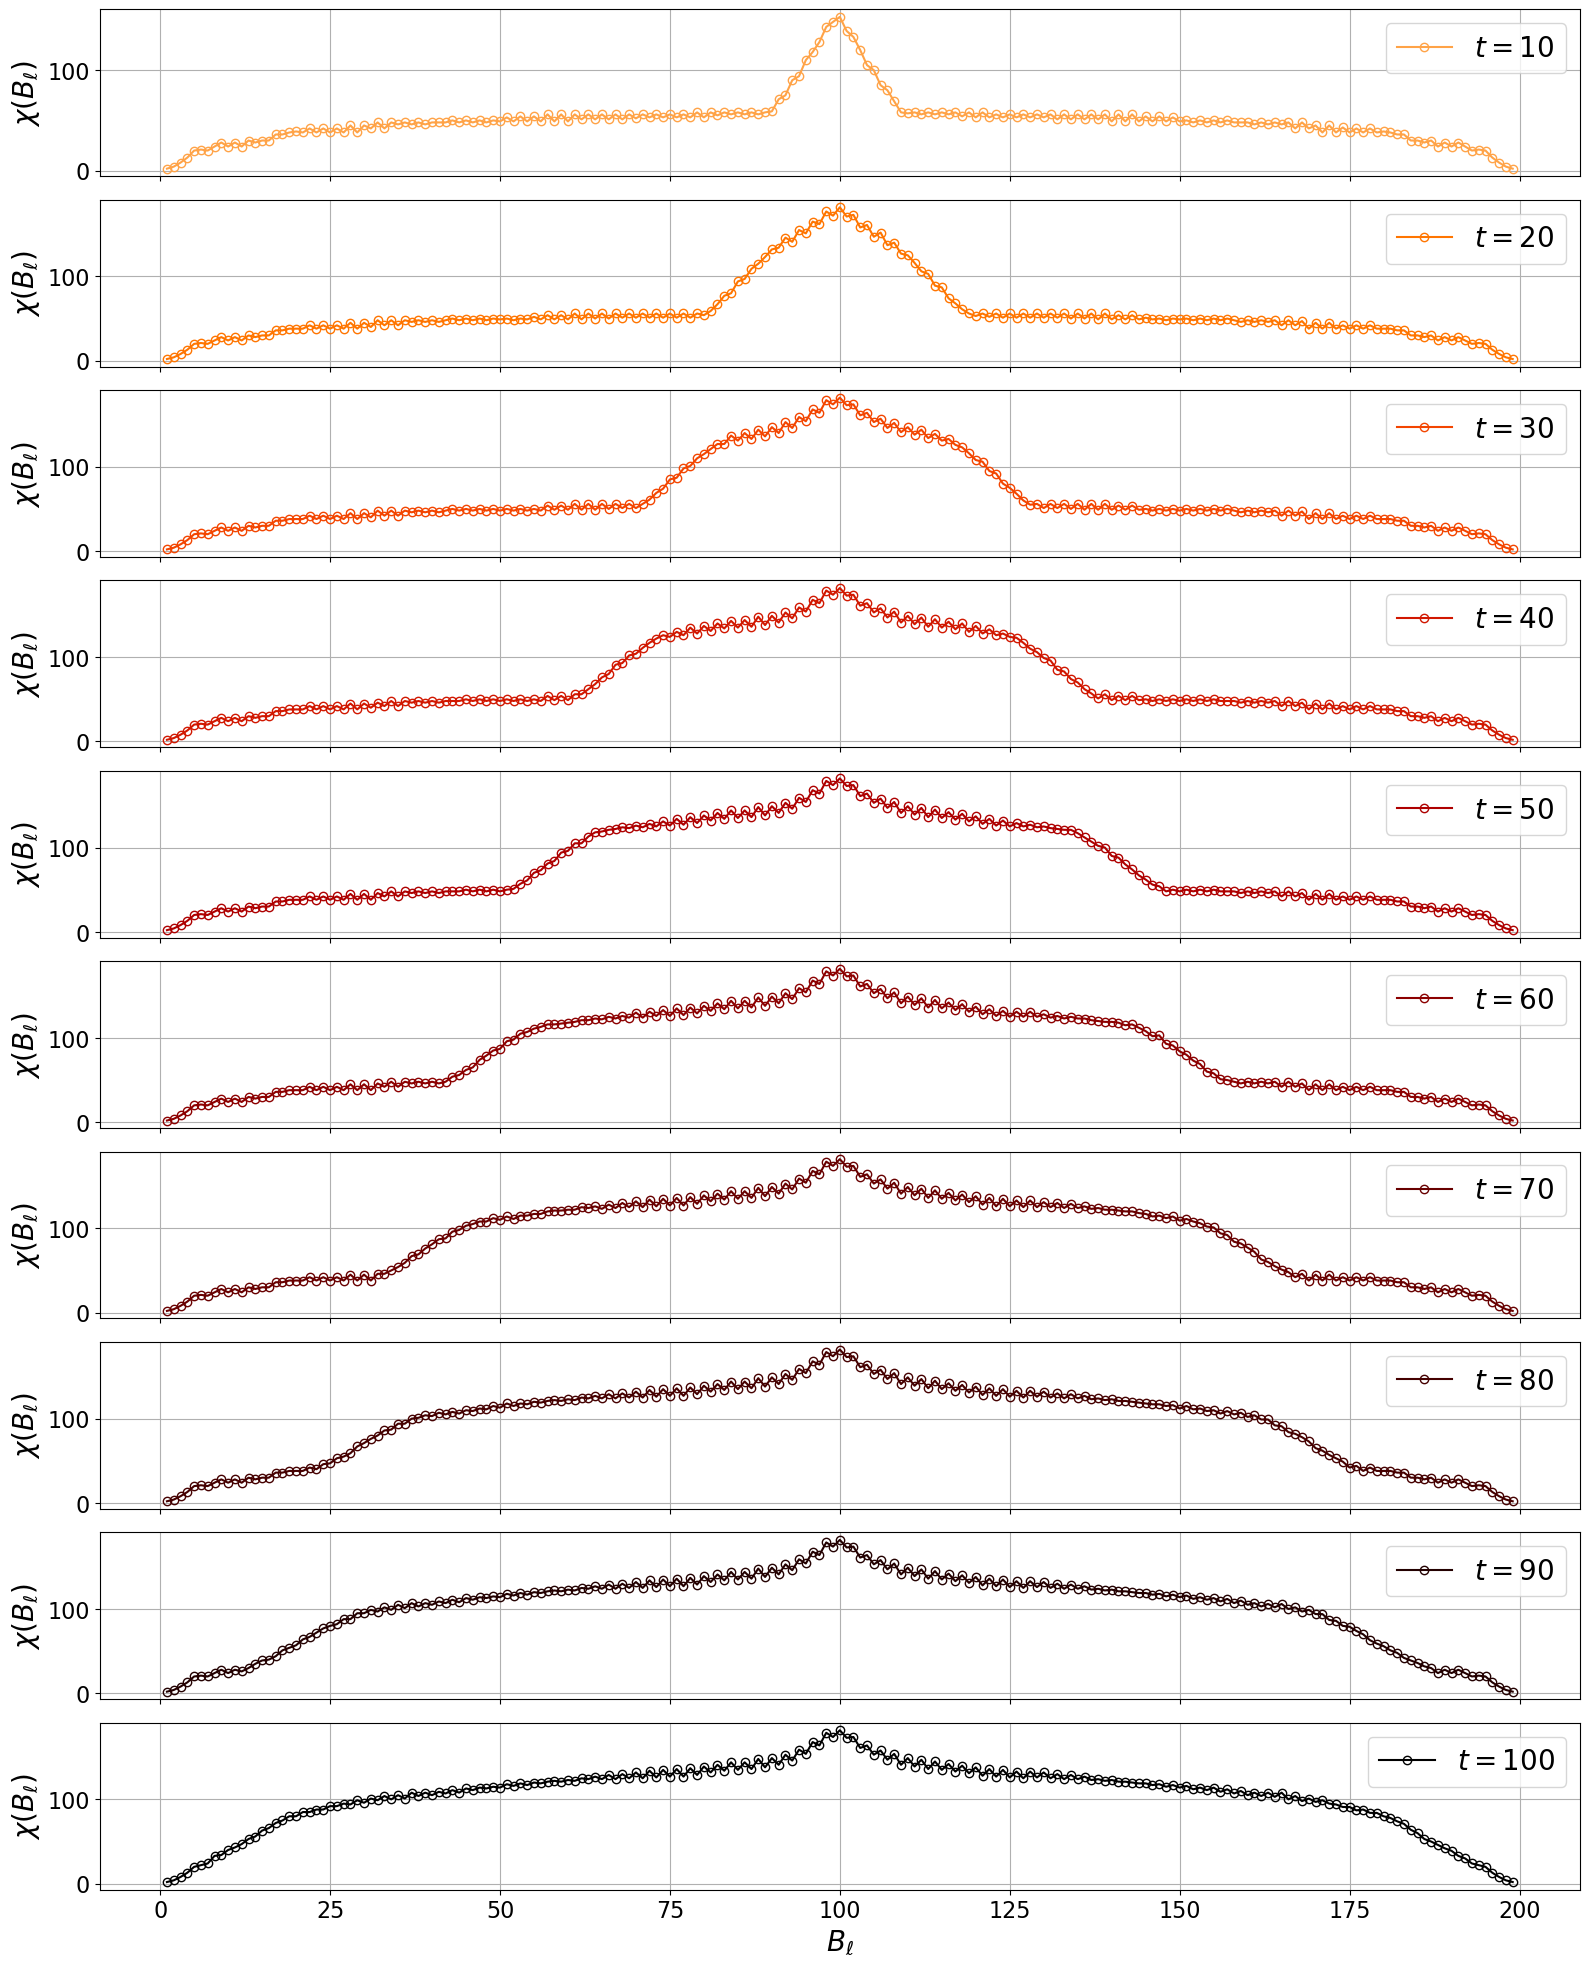

In [258]:
'''
    Analyze the \Delta\tau dependence of real-time dynamics for the kicked Ising model
'''

fig = plt.figure(figsize = (16, 32 * goldenRatio), tight_layout = True)
spec = gridspec.GridSpec(nrows = 10, ncols = 1, figure = fig)

for index in range(10):
    ax = fig.add_subplot(spec[index, 0])
    ax.plot(np.arange(1, 200), chi[(index + 1) * 100 - 1, :].real, color = color[index + 2], \
           marker = "o", markersize = 6, markerfacecolor = "none", label = label[index])
    
    if index != 9:
        ax.set_xticklabels([])
    else:
        ax.set_xlabel("$B_{\ell}$", fontsize = 20)

    ax.legend(frameon = True, fontsize = 20, ncol = 1)
    ax.set_ylabel(r'$\chi(B_{\ell})$', fontsize = 20)    
    ax.tick_params(axis = "both", which = "major", labelsize = 16)
    ax.grid()  

plt.savefig('Figures/XX_Model_TEBD_N200_T100_Chi.pdf')

In [425]:
'''
    Store the time-dependent spin correlation function to compare the exact solution
'''

file = open("Data/XX_Model_Time_Dependent_Correlation_Function.txt", "w")

file.write(r"<S_{z}^{t}(100) S_{z}^{100}>" + " " * 25 + r"<S_{z}^{t}(126) S_{z}^{100}>" + " " * 25 \
               + r"<S_{z}^{t}(176) S_{z}^{100}>" + "\n")
for index in range(Czz_TD.shape[0]):
    file.write("{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD[index, 99])  + " " * 12 + \
               "{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD[index, 125]) + " " * 12 + \
               "{0.real:.16f} + {0.imag:.16f}i".format(Czz_TD[index, 175]) + "\n")
file.close()